## Name : Tirth Hihoriya
## Roll no : 18bce244
## Prac- 2 : CNN MNIST using Keras

In [28]:
## Name : Tirth Hihoriya
## Roll no : 18bce244
## Prac- 5 : CIFAR10_Transfer_learningimport pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [29]:
train = pd.read_csv('mnist_train.csv')
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
test = pd.read_csv('mnist_test.csv')
test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Train

In [31]:
x_train = train.drop(['label'], axis=1)/255
y_train = train.label
print(X_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


### Test

In [33]:
x_test = test.drop(['label'], axis=1)/255
y_test = test.label
print(X_test.shape)
print(y_test.shape)

(10000, 784)
(10000,)


In [34]:
inputs = keras.Input(shape=(784,))
print(inputs.shape)
print(inputs.dtype)

(None, 784)
<dtype: 'float32'>


# Model

In [49]:
dense = layers.Dense(256, activation="relu")
x = dense(inputs)

x = layers.Dense(128, activation="relu")(x)

x = layers.Dense(64, activation="relu")(x)

x = layers.Dense(32, activation="relu")(x)

x = layers.Dense(16, activation="relu")(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_32 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_33 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_34 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_35 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_36 (Dense)             (None, 10)                

In [50]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=15,validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("\nTest loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/15
750/750 [==============================] - 3s 3ms/step - loss: 0.7192 - accuracy: 0.7705 - val_loss: 0.1555 - val_accuracy: 0.9541
Epoch 2/15
750/750 [==============================] - 3s 4ms/step - loss: 0.1347 - accuracy: 0.9587 - val_loss: 0.1324 - val_accuracy: 0.9621
Epoch 3/15
750/750 [==============================] - 2s 3ms/step - loss: 0.0828 - accuracy: 0.9762 - val_loss: 0.1085 - val_accuracy: 0.9713
Epoch 4/15
750/750 [==============================] - 3s 4ms/step - loss: 0.0676 - accuracy: 0.9805 - val_loss: 0.0980 - val_accuracy: 0.9737
Epoch 5/15
750/750 [==============================] - 3s 4ms/step - loss: 0.0496 - accuracy: 0.9852 - val_loss: 0.1227 - val_accuracy: 0.9711
Epoch 6/15
750/750 [==============================] - 3s 4ms/step - loss: 0.0396 - accuracy: 0.9876 - val_loss: 0.1163 - val_accuracy: 0.9753
Epoch 7/15
750/750 [==============================] - 3s 4ms/step - loss: 0.0341 - accuracy: 0.9897 - val_loss: 0.1129 - val_accuracy: 0.9758
Epoch 

## Experimenting

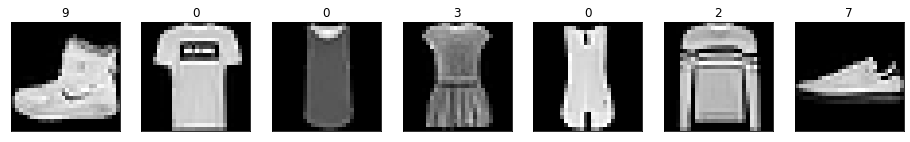

Original shape of X_train = (60000, 28, 28)
Original shape of X_test = (10000, 28, 28)
New X_train shape (60000, 784)
New X_test shape (10000, 784)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 5)                 3925      
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 24        
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_9 (Dense)              (None, 10)                70        
Total params: 4,049
Trainable params: 4,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 2.2597 - acc: 0.1688 - val_

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input

# Import fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Display the first 7 images
fig, axes = plt.subplots(ncols=7, sharex=False,
						 sharey=True, figsize=(16, 4))
for i in range(7):
	axes[i].set_title(y_train[i])
	axes[i].imshow(X_train[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

print("Original shape of X_train =", X_train.shape)
print("Original shape of X_test =", X_test.shape, end='\n')

# Reshape X_train to (60000, 784) and X_test to (10000, 784)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

print("New X_train shape", X_train.shape)
print("New X_test shape", X_test.shape, end='\n')

# Convert target (y_train and y_test) into one-hot
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
    
y_train = np.array(temp)

temp = []
for i in range(len(y_test)):
    temp.append(to_categorical(y_test[i], num_classes=10))

y_test = np.array(temp)

# Create and train sequential model
model_seq = Sequential()
model_seq.add(Dense(5, activation='sigmoid', input_shape=(X_train.shape[1],)))
model_seq.add(Dense(4, activation='sigmoid'))
model_seq.add(Dense(6, activation='sigmoid'))
model_seq.add(Dense(10, activation='softmax'))

model_seq.summary()

model_seq.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['acc'])

model_seq.fit(X_train, y_train, epochs=3, 
              validation_data=(X_test,y_test))

# Create and train functional model
input1 = Input(shape=(X_train.shape[1],))
hidden1 = Dense(5, activation='sigmoid')(input1)
hidden2 = Dense(4, activation='sigmoid')(hidden1)
output = Dense(10, activation='softmax')(hidden2)
model_func = Model(inputs=input1, outputs=output)

model_func.summary()

model_func.compile(loss='categorical_crossentropy', 
                   optimizer='adam', 
                   metrics=['acc'])

model_func.fit(X_train, y_train, epochs=3, 
               validation_data=(X_test,y_test))